In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from datetime import datetime

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/phamdinhkhanh/tabml/main/sales-of-shampoo-over-a-three-ye.csv')
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [5]:
df['Month'].value_counts()

1-01    1
1-02    1
2-09    1
2-10    1
2-11    1
2-12    1
3-01    1
3-02    1
3-03    1
3-04    1
3-05    1
3-06    1
3-07    1
3-08    1
3-09    1
3-10    1
3-11    1
2-08    1
2-07    1
2-06    1
1-09    1
1-03    1
1-04    1
1-05    1
1-06    1
1-07    1
1-08    1
1-10    1
2-05    1
1-11    1
1-12    1
2-01    1
2-02    1
2-03    1
2-04    1
3-12    1
Name: Month, dtype: int64

In [9]:
df['Month'] = '200' + df['Month']
df['Month']

0     2001-01
1     2001-02
2     2001-03
3     2001-04
4     2001-05
5     2001-06
6     2001-07
7     2001-08
8     2001-09
9     2001-10
10    2001-11
11    2001-12
12    2002-01
13    2002-02
14    2002-03
15    2002-04
16    2002-05
17    2002-06
18    2002-07
19    2002-08
20    2002-09
21    2002-10
22    2002-11
23    2002-12
24    2003-01
25    2003-02
26    2003-03
27    2003-04
28    2003-05
29    2003-06
30    2003-07
31    2003-08
32    2003-09
33    2003-10
34    2003-11
35    2003-12
Name: Month, dtype: object

In [10]:
df

,Month,Sales
0,2001-01,266.0
1,2001-02,145.9
2,2001-03,183.1
3,2001-04,119.3
4,2001-05,180.3
5,2001-06,168.5
6,2001-07,231.8
7,2001-08,224.5
8,2001-09,192.8
9,2001-10,122.9


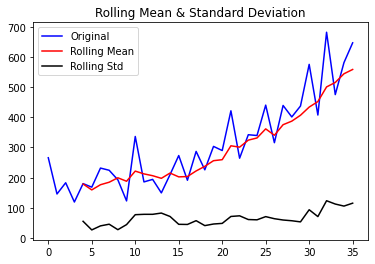

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [11]:


def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5,center=False).mean()
    rolstd = timeseries.rolling(window=5,center=False).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


test_stationarity(df['Sales'])

In [ ]:
pd.rolling_mean(df['Sales'].apply(lambda x:math.log(x)), 2).diff(1).plot()
# test_stationarity(ts_log_mv_diff)